In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read the dataset and check if it duplicate row 
bmi_dataset = pd.read_csv("bmi.csv")
bmi_dataset.drop_duplicates(inplace=True)

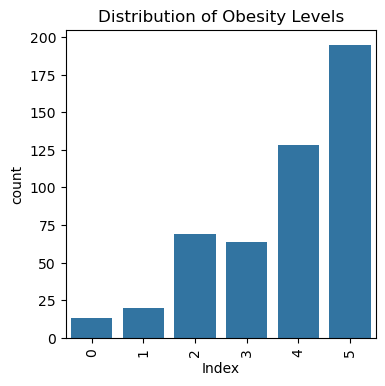

In [8]:
# create graph for the label
plt.figure(figsize=(4, 4))
sns.countplot(x='Index', data=bmi_dataset)
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=90)
plt.show()

In [10]:
# change the Gender col to num value col
label_encoder = LabelEncoder()
bmi_dataset['Gender'] = label_encoder.fit_transform(bmi_dataset['Gender'])

In [12]:
# normalize 'Height' and 'Weight' values to a range of [0,1] using Min-Max Scaling
scale = MinMaxScaler()
bmi_dataset[['Height', 'Weight']] = scale.fit_transform(bmi_dataset[['Height', 'Weight']])

In [14]:
# separate the data into training and testing datasets
x = bmi_dataset.drop(columns=['Index'])
y = bmi_dataset['Index']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
# use RandomForestClassifier for model classification
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
prediction = model.predict(x_test)

In [18]:
# test the model accuracy
accuracy = accuracy_score(y_test, prediction)
print(f"accuracy {accuracy}")

accuracy 0.8367346938775511


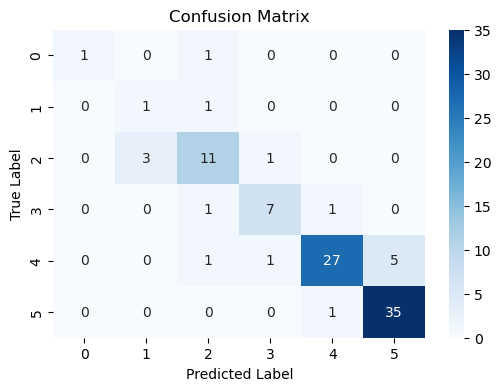

In [20]:
# create confusion matrix for the model
conf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()